In [3]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import torch
sys.path.append("D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main")
from PDE import multiscale_equation

In [4]:
resolution = 501
field_min,field_max = 0,1
x1_list = np.linspace(field_min, field_max, resolution)
x2_list = np.linspace(field_min, field_max, resolution)
X1,X2 = np.meshgrid(x1_list,x2_list)
X_field = torch.tensor(np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis = 1)).float()

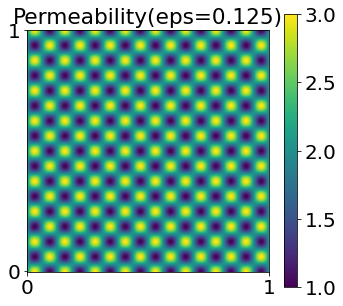

In [45]:
eps = 0.125
equation = multiscale_equation(eps = eps)
a_field = equation.a(X_field).numpy().reshape(resolution,resolution)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(5,5))

plt.imshow(a_field,origin = 'lower',interpolation = None,vmin=1,vmax=3)
plt.xticks([0,resolution],[0,1],fontsize = 20)
plt.yticks([0,resolution],[0,1],fontsize = 20)
# plt.title(r'Permeability($\varepsilon$={})'.format(equation.eps))
plt.title(r'Permeability(eps={})'.format(equation.eps))
plt.tight_layout()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
# plt.savefig('figs/permeability(eps={}).png'.format(eps),dpi = 300)